In [15]:
import pandas as pd
from sklearn.datasets import load_digits
from matplotlib import pyplot as plt

In [16]:
digits=load_digits()

In [17]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 640x480 with 0 Axes>

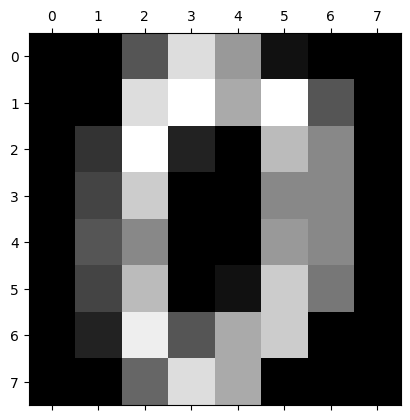

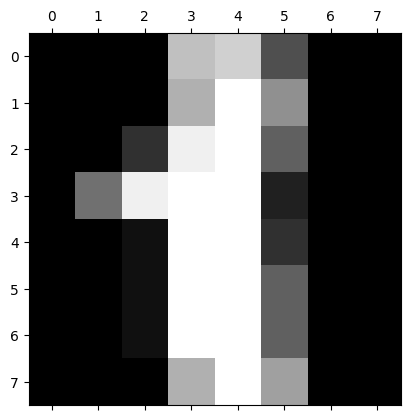

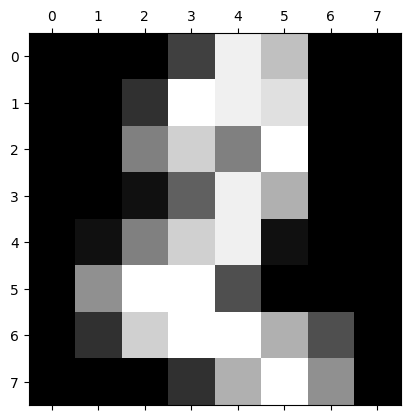

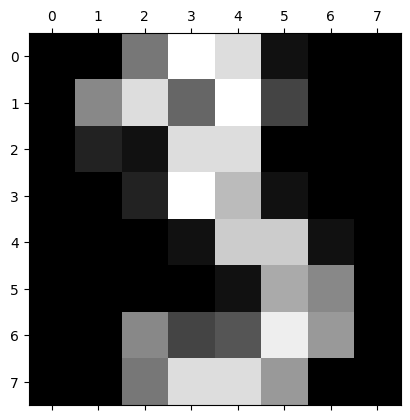

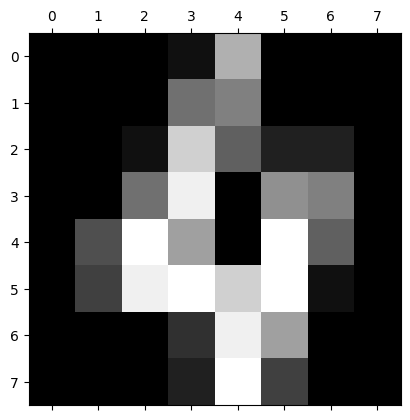

In [21]:
plt.gray()
for i in range(0,5):
    plt.matshow(digits.images[i])



In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [60]:
cv=GridSearchCV(KNeighborsClassifier(),{'n_neighbors':range(1,10)},cv=5,return_train_score=False)


In [61]:
cv.fit(digits.data,digits.target)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 10)})

In [62]:
dir(cv)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_check_refit_for_multimetric',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run_search',
 '_select_best_index',
 '_validate_data',
 '_validate_params',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'fit',
 'get_params',
 'inverse_transform',
 'multimetric_',
 'n_fe

In [63]:
df=pd.DataFrame(cv.cv_results_)

In [64]:
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001096,0.000648,0.009708,0.002955,1,{'n_neighbors': 1},0.961111,0.952778,0.966574,0.986072,0.955432,0.964393,0.011838,3
1,0.000369,0.000133,0.006469,0.003232,2,{'n_neighbors': 2},0.961111,0.966667,0.969359,0.977716,0.961003,0.967171,0.006181,1
2,0.000273,0.000032,0.004854,0.000846,3,{'n_neighbors': 3},0.955556,0.958333,0.966574,0.986072,0.966574,0.966622,0.010672,2
3,0.000250,0.000003,0.004636,0.000219,4,{'n_neighbors': 4},0.947222,0.958333,0.966574,0.980501,0.966574,0.963841,0.010946,4
4,0.000252,0.000002,0.005114,0.000500,5,{'n_neighbors': 5},0.947222,0.955556,0.966574,0.980501,0.963788,0.962728,0.011169,5
5,0.000248,0.000003,0.004500,0.000075,6,{'n_neighbors': 6},0.944444,0.958333,0.966574,0.974930,0.952646,0.959386,0.010612,7
6,0.000247,0.000002,0.006435,0.002743,7,{'n_neighbors': 7},0.936111,0.961111,0.969359,0.980501,0.952646,0.959946,0.015059,6
7,0.000250,0.000008,0.005482,0.001349,8,{'n_neighbors': 8},0.936111,0.958333,0.969359,0.977716,0.949861,0.958276,0.014580,8
8,0.000247,0.000004,0.004984,0.000588,9,{'n_neighbors': 9},0.930556,0.952778,0.972145,0.977716,0.949861,0.956611,0.016887,9


In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(digits.data,digits.target,random_state=5,test_size=0.2)

In [66]:
kn=KNeighborsClassifier(n_neighbors=5)

In [67]:
kn.fit(X_train,y_train)

KNeighborsClassifier()

In [68]:
kn.score(X_test,y_test)

0.9805555555555555

In [79]:
from sklearn.metrics import confusion_matrix,classification_report
cm= confusion_matrix(kn.predict(X_test),y_test)

<Axes: >

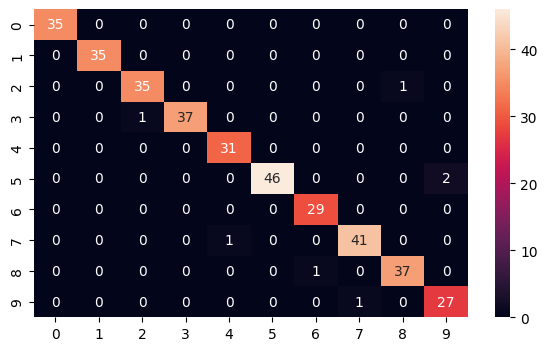

In [80]:
import  seaborn as sbn
plt.figure(figsize=(7,4))
plt.xlabel('predicted')
plt.ylabel('actual')
sbn.heatmap(cm,annot=True)

In [82]:
print(classification_report(y_test,kn.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        35
           2       0.97      0.97      0.97        36
           3       0.97      1.00      0.99        37
           4       1.00      0.97      0.98        32
           5       0.96      1.00      0.98        46
           6       1.00      0.97      0.98        30
           7       0.98      0.98      0.98        42
           8       0.97      0.97      0.97        38
           9       0.96      0.93      0.95        29

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

